In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-lT')],
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-lT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)

mc = load_case(json_files_mc[0])
alg1 = load_case(json_files_alg1[0])

# Files

MC:  ['mc-lT.json']
A1:  ['a1-lT.json']


## mc-lT.json

Temperature: 0.5


## a1-lT.json

Temperature: 0.5


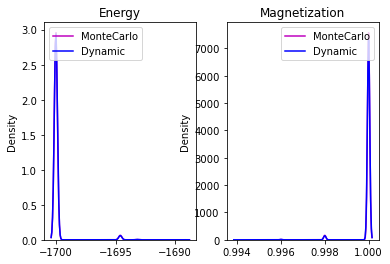

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt
import seaborn as sns

fig_kde, axes = plt.subplots(1, 2)
h1 = sns.kdeplot(data=mc["energy_sample"], bw_method='scott', color='m', ax=axes[0])
h1.set(xlabel=None)
h2 = sns.kdeplot(data=alg1["energy_sample"], bw_method='scott', color='b', ax=axes[0])
h2.set(xlabel=None)
m1 = sns.kdeplot(data=mc["magnetization_sample"], bw_method='scott', color='m', ax=axes[1])
m1.set(xlabel=None)
m2 = sns.kdeplot(data=alg1["magnetization_sample"], bw_method='scott', color='b', ax=axes[1])
m2.set(xlabel=None)

axes[0].set_title("Energy")
axes[0].legend(['MonteCarlo', 'Dynamic'], loc="upper left")
axes[1].set_title("Magnetization")
axes[1].legend(['MonteCarlo', 'Dynamic'], loc="upper right")

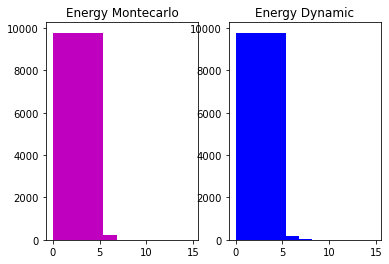

In [4]:
chain = Chain(size=100)
bin_edges_engy_mc, metropolis_engy = hist(chain, mc["energy_sample"], engy_flag=True)
bin_edges_engy_dynamic, dynamic_engy = hist(chain, alg1["energy_sample"], engy_flag=True)
fig_engy, axes = plt.subplots(1, 2)
axes[0].hist(metropolis_engy, bins=bin_edges_engy_mc, label='Metropolis', color='m')
axes[1].hist(dynamic_engy, bins=bin_edges_engy_dynamic, label='Dynamic', color='b')
axes[0].set_title("Energy Montecarlo")
axes[1].set_title("Energy Dynamic")
plt.show()

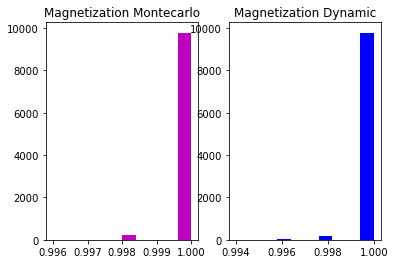

In [5]:
bin_edges_m_mc, metropolis_m = hist(chain, mc["magnetization_sample"], engy_flag=False)
bin_edges_m_dynamic, dynamic_m = hist(chain, alg1["magnetization_sample"], engy_flag=False)
fig_m, axes = plt.subplots(1, 2)
axes[0].hist(metropolis_m, label='Metropolis', color='m')
axes[1].hist(dynamic_m,label='Dynamic', color='b')
axes[0].set_title("Magnetization Montecarlo")
axes[1].set_title("Magnetization Dynamic")
plt.show()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

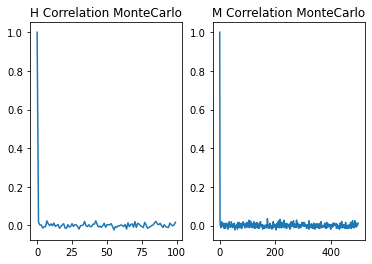

In [6]:
mc_engy_corr = acrl(mc["energy_sample"], 100)
mc_m_corr = acrl(mc["magnetization_sample"], 500)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

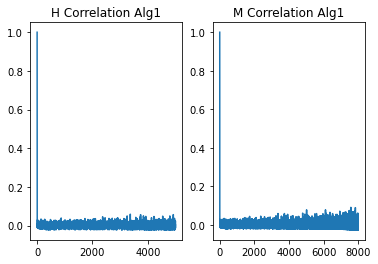

In [7]:
alg1_engy_corr = acrl(alg1["energy_sample"], 5000)
alg1_m_corr = acrl(alg1["magnetization_sample"], 8000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [8]:
mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_m_counts, alg1_m_counts = equilibrate_counts(mc_m_counts,alg1_m_counts)
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])
mc_m_counts, alg1_m_counts = equilibrate_counts(mc_engy_counts,alg1_engy_counts)

In [9]:
from two_samples import chi_squared_test
display(Markdown("# Chi2 test two sample - Energy"))
print(f'H0: the two sample comes from the same distribution')
mc_engy = list(mc_engy_counts.values())
alg1_engy = list(alg1_engy_counts.values())
print(f'Energy :', chi_squared_test(mc_engy, alg1_engy))

# Chi2 test two sample - Energy

H0: the two sample comes from the same distribution
Energy : 0.4731357284187173


In [10]:
from two_samples import chi_squared_test
display(Markdown("# Chi2 test two sample - Magentization"))
print(f'H0: the two sample comes from the same distribution')
mc_m = list(mc_m_counts.values())
alg1_m = list(alg1_m_counts.values())
print(f'Energy :', chi_squared_test(mc_m, alg1_m))

# Chi2 test two sample - Energy

H0: the two sample comes from the same distribution
Energy : 0.4731357284187173
